# FDA - HW3-2  
* Dataset:　[Travel Review Ratings](https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings)  
* Define a problem: 根據過去的評分資料將使用者分群(clusterring), 可用來決定未來要推薦給該使用者的旅遊地點種類

## 讀取資料並檢查是否有缺失值
由 **info()** 查看是否有缺失值,  
發現 '**Category 12**' 及 '**Category 24**' 各有1個缺失值,  
且最後還多出了1行**Unnamed column**, 該行只有2個值

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 讀取資料並用info()看是否有缺失值
df = pd.read_csv('./google_review_ratings.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

## 調整異常欄位及查看資料缺失處
### 把'Category 11'的type轉成float  
由上面的info發現 '**Category 11**' 的type特別奇怪,  
本來應該是**float64**, 但卻是**object**, 所以把該行轉成float  
但要轉換時發現有error顯示該行的值中有出現 "**\t**"  
所以先把 "**\t**" 去掉再做轉換
### 查看缺失值出現的地方
印出缺失值出現處,  分別為第1347列和第2712列

In [2]:
# 把'Category 11'欄位中的'\t'去掉後, 將該欄位的值都轉成float
df['Category 11'] = df['Category 11'].str.replace('\t', '').astype(float)
print(df.info())


df_drop = df.drop('User', axis=1)
tmp = df_drop.loc[:, ~df_drop.columns.str.contains('^Unnamed')]
print()
# 印出缺失值出現處
print(np.where(np.isnan(tmp)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   float64
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

## 確認缺失值原因再決定如何處理缺失值
印出原資料表的那2列, 發現剛好就是最後多出一行的那2列,  
因此猜測應該是資料錯位平移了, 決定將該列缺失值以後的資料都往前一格平移填補

In [3]:
print(df_drop.iloc[1347])
print()
print(df_drop.iloc[2712])

Category 1     1.06
Category 2     1.10
Category 3     5.00
Category 4     3.28
Category 5     5.00
Category 6     5.00
Category 7     5.00
Category 8     1.83
Category 9     1.81
Category 10    5.00
Category 11    5.00
Category 12    1.74
Category 13    1.73
Category 14    1.74
Category 15    1.77
Category 16    1.80
Category 17    0.00
Category 18    0.00
Category 19    0.00
Category 20    0.00
Category 21    0.00
Category 22    5.00
Category 23    0.26
Category 24     NaN
Unnamed: 25    1.04
Name: 1347, dtype: float64

Category 1      1.71
Category 2      1.68
Category 3      1.46
Category 4      1.13
Category 5      1.12
Category 6      1.15
Category 7      1.26
Category 8      1.17
Category 9      1.59
Category 10     0.85
Category 11    22.00
Category 12      NaN
Category 13     0.84
Category 14     5.00
Category 15     5.00
Category 16     1.08
Category 17     1.10
Category 18     1.04
Category 19     5.00
Category 20     4.43
Category 21     5.00
Category 22     5.00
Category 2

## 處理缺失值
將第1347列中第23行以後的資料往前一格平移填補  
將第2712列中第11行以後的資料都往前一格平移填補

In [4]:
# 將第1347列中第23行以後的資料往前一格平移填補
df_drop.iloc[1347][23] = df_drop.iloc[1347][24]
print("填補後: ")
print(df_drop.iloc[1347])
print()

# 將第2712列中第11行以後的資料都往前一格平移填補
for i in range(11, 24):
    df_drop.iloc[2712][i] = df_drop.iloc[2712][i+1]
print(df_drop.iloc[2712])

填補後: 
Category 1     1.06
Category 2     1.10
Category 3     5.00
Category 4     3.28
Category 5     5.00
Category 6     5.00
Category 7     5.00
Category 8     1.83
Category 9     1.81
Category 10    5.00
Category 11    5.00
Category 12    1.74
Category 13    1.73
Category 14    1.74
Category 15    1.77
Category 16    1.80
Category 17    0.00
Category 18    0.00
Category 19    0.00
Category 20    0.00
Category 21    0.00
Category 22    5.00
Category 23    0.26
Category 24    1.04
Unnamed: 25    1.04
Name: 1347, dtype: float64

Category 1      1.71
Category 2      1.68
Category 3      1.46
Category 4      1.13
Category 5      1.12
Category 6      1.15
Category 7      1.26
Category 8      1.17
Category 9      1.59
Category 10     0.85
Category 11    22.00
Category 12     0.84
Category 13     5.00
Category 14     5.00
Category 15     1.08
Category 16     1.10
Category 17     1.04
Category 18     5.00
Category 19     4.43
Category 20     5.00
Category 21     5.00
Category 22     5.00
Cate

## 檢查異常值
上面印出第2712列時發現其中有欄位的值是22,  
由於此資料集的欄位值皆不應超過5, 因此發現有異常值  
檢查整個dataframe是否還有其他值也超過5的地方

In [5]:
# 印出所有值超過5的地方
print(np.where(df_drop > 5))

(array([2712]), array([10]))


## 處理異常值
檢查整個dataframe後確定只有1列有異常值,  
因此決定直接捨棄掉該列資料,  
避免異常值影響結果

In [6]:
# 去掉唯一有異常值的第2712列
df_drop = df_drop.drop([2712])

## 觀察相關係數
將各欄位間的相關係數視覺化, 觀察哪些欄位有較高相關, 幫助決定如何分群 

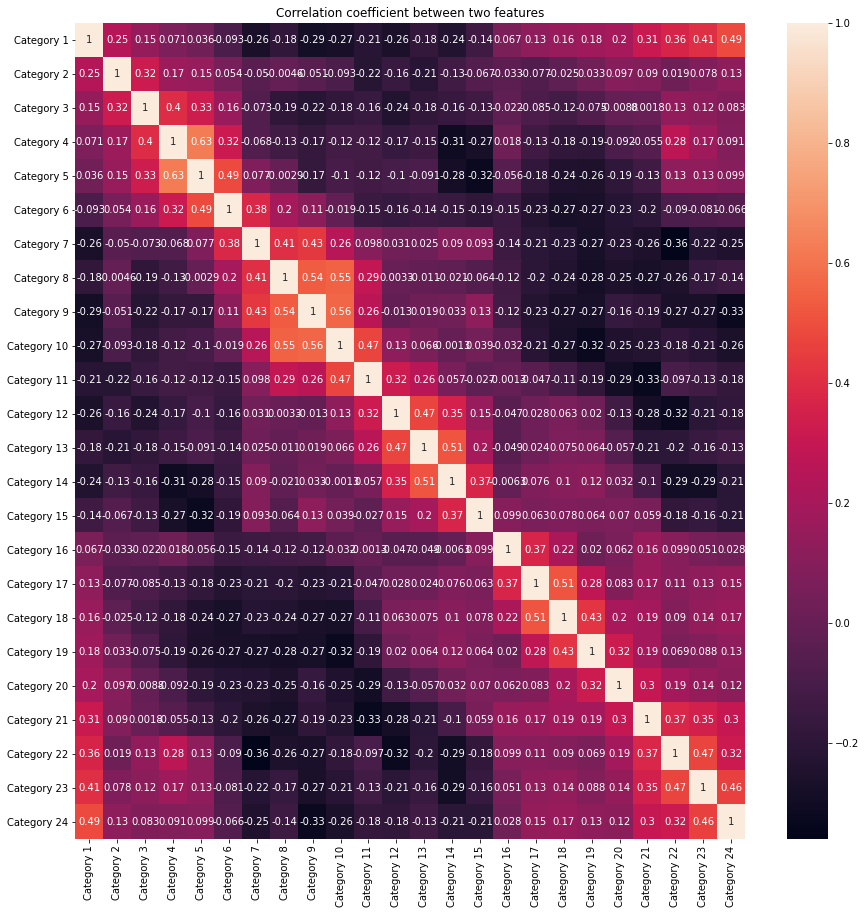

In [7]:
# 視覺化相關係數
df_drop = df_drop.loc[:, ~df_drop.columns.str.contains('^Unnamed')] # Delete the redundant column
plt.figure(figsize=(15, 15))
sns.heatmap(df_drop.corr(), annot=True)
plt.title('Correlation coefficient between two features')
plt.show()

## 定出原始的分群
因為clusterring是unsupervised,  
但為了讓分群實驗有標準可對照,  
先將有較高相關的category歸為一組,  
歸出幾組後, 計算使用者對哪一組的平均評分較高, 就把該使用者的分群定為那一組

In [8]:
# 將有較高相關的category歸為一組
c0 = [3, 4, 5, 6]
c1 = [7, 8, 9, 10, 11]
c2 = [12, 13, 14]
c3 = [17, 18, 19]
c4 = [22, 23, 24]
set_list = [c0, c1, c2, c3, c4]

cluster_list = []
# 計算使用者對哪一組的平均評分較高, 就把該使用者的分群定為那一組
for index, row in df_drop.iterrows():
    max_rating = 0
    max_set = -1
    for i in range(len(set_list)):
        rating_sum = 0
        for j in set_list[i]:
            rating_sum += row[j-1]
        rating_avg = rating_sum/len(set_list[i])
        if(rating_avg > max_rating):
            max_rating = rating_avg
            max_set = i
    cluster_list.append(max_set)

# 增加'cluster'欄位代表使用者歸屬的群
df_drop['cluster'] = cluster_list

## 使用KMeans分成5群
分別將"**沒有降維就直接分群**"及"**先經降維再分群**"的結果與原先設定的分群做對照,  
"**沒有降維就直接分群**"跟原先定義的分群較像,  
"**先經降維再分群**"分得比較漂亮

time: 0.20151233673095703


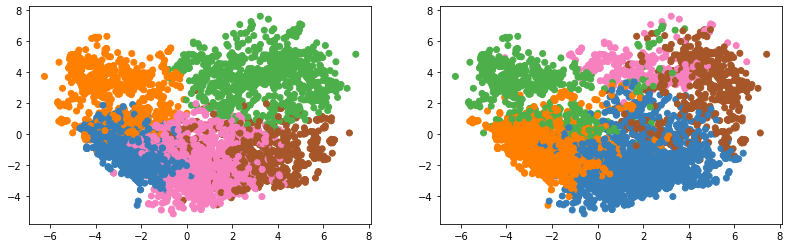

time: 0.20102906227111816


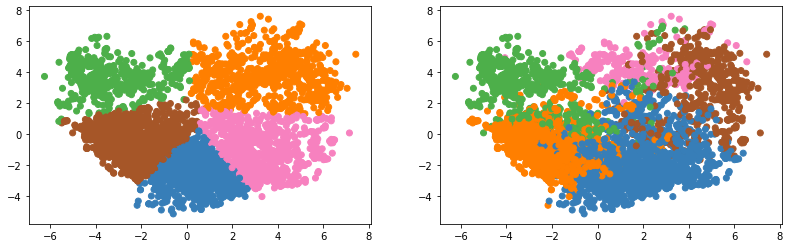

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

# 沒有經降維就直接分群, 分群完後為了視覺化才降維
def clustering(algo, train_x):
    start = time.time()
    y_pred = algo.fit_predict(train_x)
    print('time:',time.time()-start)
    colors = np.array(list(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']))
    pca1 = PCA(n_components=2)
    x_new = pca1.fit_transform(train_x)
    plt.figure(figsize=(13.5, 4))
    plt.subplot(1,2,1)
    # 分群實驗結果
    plt.scatter(x_new[:, 0], x_new[:, 1], color=colors[y_pred])
    plt.subplot(1,2,2)
    # 原先設定的分群
    plt.scatter(x_new[:, 0], x_new[:, 1], color=colors[df_drop['cluster']])
    plt.show()

# 先用PCA降成2維再分群
def PCA_before(algo, train_x):
    pca1 = PCA(n_components=2)
    x_new = pca1.fit_transform(train_x)
    start = time.time()
    y_pred = algo.fit_predict(x_new)
    print('time:',time.time()-start)
    colors = np.array(list(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']))
    plt.figure(figsize=(13.5, 4))
    plt.subplot(1,2,1)
    # 分群實驗結果
    plt.scatter(x_new[:, 0], x_new[:, 1], color=colors[y_pred])
    plt.subplot(1,2,2)
    # 原先設定的分群
    plt.scatter(x_new[:, 0], x_new[:, 1], color=colors[df_drop['cluster']])
    plt.show()


# 使用KMeans分群
kmeans = KMeans(n_clusters=5,
                init = 'k-means++',
                n_init = 10, 
                max_iter = 500,
               random_state = 0)

# 比較降維與否的差別
clustering(kmeans, df_drop) # 沒有先降維就直接分群
PCA_before(kmeans, df_drop) # 有先降維再分群

## 使用MiniBatchKMeans分成5群
改用**MiniBatchKMean**後,  
意外發現會分得跟原先定義的分群更像(右上角分出了兩群, 右下角合為一群)  
另外因為MiniBatchKMeans收斂較快, 執行時間比使用KMeans快很多

time: 0.10763096809387207


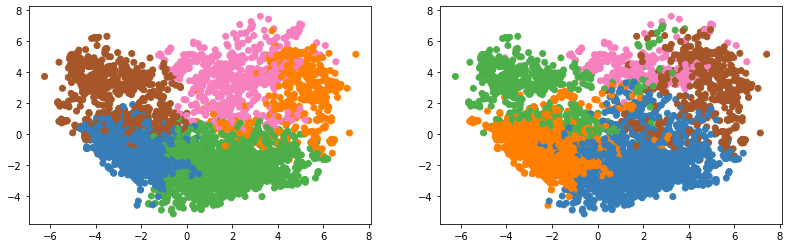

time: 0.08715438842773438


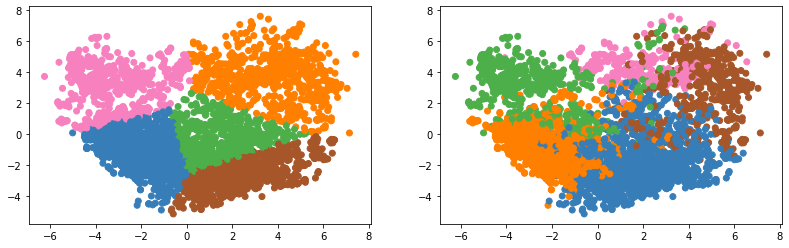

In [10]:
from sklearn.cluster import MiniBatchKMeans
minibatch = MiniBatchKMeans(n_clusters=5,
                         random_state = 0,
                        batch_size = 50)
clustering(minibatch, df_drop)
PCA_before(minibatch, df_drop)

## 使用KMeans分成7群
嘗試調整原先設定的分群, 改成分7群後, 再用Kmeans跑一次  
分成7群時"先降維再分群"的結果似乎有比5群時更接近原先定義的分群

time: 1.228243112564087


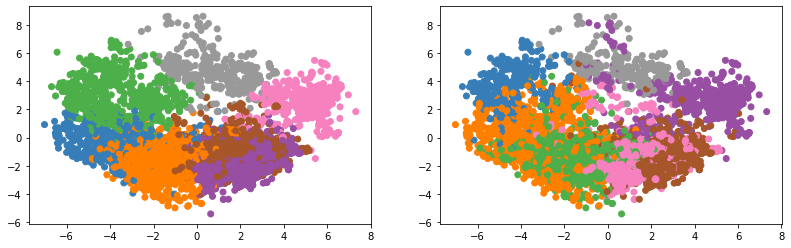

time: 0.39964866638183594


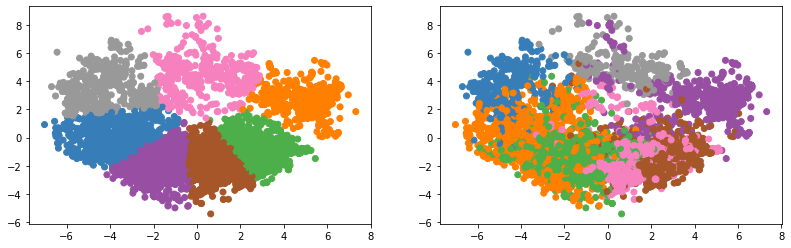

In [11]:
# 把原本設定的群分得更細, 若一組中有任兩個相關係數低於0.3的pair就將它們拆組
c0 = [1, 22, 23, 24]
c1 = [3, 4, 5]
c2 = [5, 6]
c3 = [7, 8, 9, 10]
c4 = [10, 11]
c5 = [12, 13, 14]
c6 = [17, 18, 19]
set_list = [c0, c1, c2, c3, c4, c5, c6]

cluster_list = []
# 重新定義使用者的分群
for index, row in df_drop.iterrows():
    max_rating = 0
    max_set = -1
    for i in range(len(set_list)):
        rating_sum = 0
        for j in set_list[i]:
            rating_sum += row[j-1]
        rating_avg = rating_sum/len(set_list[i])
        if(rating_avg > max_rating):
            max_rating = rating_avg
            max_set = i
    cluster_list.append(max_set)
df_drop['cluster'] = cluster_list


kmeans = KMeans(n_clusters=7,
                init = 'k-means++',
                n_init = 10, 
                max_iter = 500,
                random_state = 0,
                n_jobs = -1)
clustering(kmeans, df_drop)
PCA_before(kmeans, df_drop)

## 使用MiniBatchKMeans分成7群
這次改用MiniBatchKMean後的改變比較不明顯,  
但下方中間偏右的地方仍有改善一點點, 更接近自定義的分群 

time: 0.06031608581542969


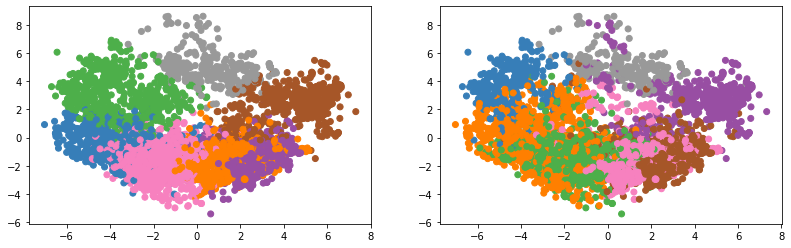

time: 0.11518573760986328


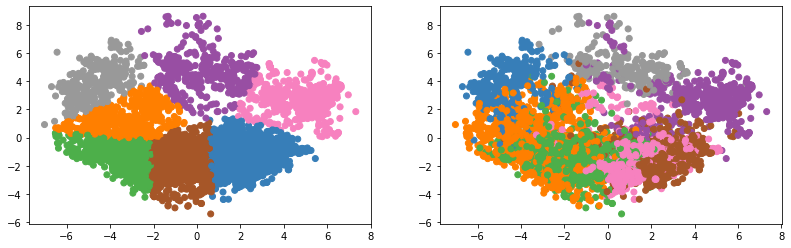

In [12]:
minibatch = MiniBatchKMeans(n_clusters=7,
                         n_init = 10, 
                         max_iter = 500,
                         random_state = 0,
                         batch_size = 50)
clustering(minibatch, df_drop)
PCA_before(minibatch, df_drop)